# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [31]:
# import libraries here
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import zipfile

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [32]:
# your code here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [4]:
# your code here
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [5]:
# your code here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [ ]:
"""
your comments here
"""
## cities and states as object (string)
## temperature as float (numbers)

#### Select the rows where state is New York.

In [9]:
# your code here
new_york = temp[temp['State'] == 'New York']  ##select rows were state is new york
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [11]:
# your code here
new_york.describe()  ## average is 10.74

,Temperature
count,3.000000
mean,10.740741
std,8.133404
min,3.333333
25%,6.388889
50%,9.444444
75%,14.444444
max,19.444444


#### Which states and cities have a temperature above 15 degrees Celsius?

In [12]:
# your code here
hotter_cities = temp[temp['Temperature'] > 15]  ## select rows were temperature is higher than 15
hotter_cities                                   ## there are 4 results

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [13]:
# your code here
colder_cities = temp[temp['Temperature'] < 15]  ## select rows were state is new york
colder_cities                                   ## there are 3 results

,City,State,Temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [14]:
# your code here

hotter_cities = temp[(temp['Temperature'] > 15)&(temp['Temperature'] < 20)]  ## select rows were temperature is higher than 15
hotter_cities                                   ## there are 2 results

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [34]:
# your code here
temp.groupby('State').agg({'Temperature':'mean'}) ##mean

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [35]:
temp.groupby('State').agg({'Temperature':'std'})  ##std deviation

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [16]:
# your code here
employees = pd.read_csv('Employee.csv')   ##import csv
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the `employees` dataframe. Comment your results.

In [17]:
# your code here
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [ ]:
"""
your comments here
"""
## columns Name, Department, Education, Gender e Title - object (string)
## columns Years and Salary - int (number)

#### What's the average salary in this company?

In [18]:
# your code here
employees.describe()  ## 48.89

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### What's the highest salary?

In [ ]:
# your code here

## the higher salary is 70

#### What's the lowest salary?

In [ ]:
# your code here

## the lower is 30

#### Who are the employees with the lowest salary?

In [19]:
# your code here
employees[employees['Salary'] == 30]  ## Maria and David

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find all the information about an employee called David.

In [20]:
# your code here
employees[employees['Name'] == 'David']  ## David is an analyst that works in HR department

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [21]:
# your code here
employees[employees['Name'] == 'David']['Salary']  ## see only salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [22]:
# your code here
employees[employees['Title'] == 'associate']  ## 3 employees are associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [23]:
# Method 1
# your code here
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [25]:
# Method 2
# your code here
employees[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [26]:
# your code here
employees[(employees['Title'] == 'associate')&(employees['Salary'] > 55)]  ## only pedro

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [27]:
# your code here
employees.groupby('Years').agg({'Salary':'mean'})  ## increases along the years, with exception of year 4

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average salary per title?

In [28]:
# your code here
employees.groupby('Title').agg({'Salary':'mean'})  ##higher salary as VP

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


####  Find the salary quartiles.


In [29]:
# your code here
employees['Salary'].describe()

count     9.000000
mean     48.888889
std      16.541194
min      30.000000
25%      35.000000
50%      55.000000
75%      60.000000
max      70.000000
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [30]:
# your code here
employees.groupby('Gender').agg({'Salary':'mean'})  ##difference of 2.5 between F and M

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [32]:
# your code here
employees.groupby('Department').describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [35]:
# your code here
employees.groupby('Department').agg({'Salary':lambda a : max(a)-min(a)})

,Salary
Department,
HR,40
IT,40
Sales,0


# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [2]:
# your code here
zf = zipfile.ZipFile('Orders.zip') ## unzip
orders = pd.read_csv(zf.open('Orders.csv'))                                       ## open csv
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [3]:
# your code here
orders.dtypes ## only description and country are strings. 

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [4]:
orders.describe()  

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
"""
your comments here
"""
## the orders are from 2010 and 2011. 
## Most orders are associated with lower quantities (75% - 12).
## most orders are under 20 total spend.

####  What is the average purchase price?

In [ ]:
# your code here
## 22.4

#### What are the highest and lowest purchase prices? 

In [ ]:
# your code here
## 0.0 and 168469.6

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [5]:
# your code here
customers_spain = orders[orders['Country'] == 'Spain']['CustomerID'].unique()    ##select unique customer id from spain
customers_spain

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442], dtype=int64)

#### How many customers do we have in Spain?

In [6]:
# your code here
len(customers_spain)  ## 30 customers

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [58]:
# your code here
client_orders = orders.groupby('CustomerID').agg({'Quantity':'sum'})   ##sum quantities both by customer
client_orders[client_orders['Quantity']>50] ## select customers that bought more than 50 items

,Quantity
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197
...,...
18278,66
18281,54
18282,103


#### Select orders from Spain that include more than 50 items.

In [9]:
# your code here
spain_orders = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]   ##orders from spain with more than 50 units
spain_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders.

In [10]:
# your code here
free_orders = orders[orders['amount_spent'] == 0]   ## orders associated with 0 amount spent
free_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [14]:
# your code here
lunch_bag = orders[orders['Description'].str.startswith("lunch bag") == True]   ## see descriptions that start with lunch bag
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [15]:
# your code here
lunch_bag_2011 = orders[(orders['Description'].str.startswith("lunch bag") == True) & (orders['year'] == 2011)]  ##see only results from 2011
lunch_bag_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

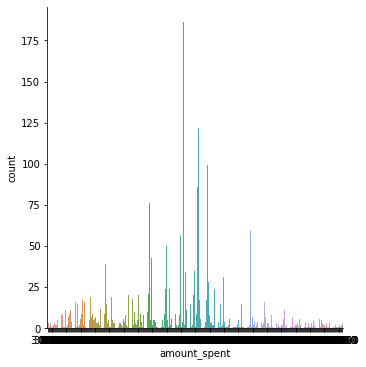

In [16]:
# your code here
sns.catplot(x='amount_spent',kind="count", data=orders[orders['Country'] == 'Spain'])

#### Select all orders made in the month of August.

In [17]:
# your code here
august_orders = orders[orders['month'] == 8]   ## orders from month 8
august_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [24]:
# your code here
august_orders_country = orders[orders['month'] == 8]['Country'].value_counts()  ##orders from month 8 by client
august_orders_country

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [27]:
# your code here
august_money_country = orders.groupby('Country').agg({'amount_spent':'mean'})  ## orders by country and mean of amunt spent
august_money_country

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [29]:
# your code here
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]  ##postage


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?

In [30]:
# your code here
spent_year = orders.groupby('year').agg({'amount_spent':'mean'})  ## the amount spent in 2011 is higher in average
spent_year

,amount_spent
year,
2010,21.892733
2011,22.430074
